## US - Accidents Exploratory Data Analysis

### TODO - Talk about EDA
### TODO - Talk about the dataset (source, what it contains, how it will be useful)
* Kaggle
* Information about accidents
* Can be useful to prevent accidents
* Mention that this data does not contain any data about 'New York'

### Downloading the dataset

Downloading Link : https://www.kaggle.com/sobhanmoosavi/us-accidents

### Data Preparation and Cleaning
* Load the file using pandas.
* Look at some information about the data & the columns.
* Fix any missing or incorrect values.

#### Importing all the necessary libraries

In [1]:
# Importing everything we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing this so that we do not miss out on any columns..

In [2]:
# As our data is big in size we will use this to display all the coolumns we have
pd.get_option("display.max_columns",None)

20

#### Importing the dataset

In [3]:
df = pd.read_csv('us-accidents.csv')

In [4]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# Checking what all columns we have..
df.columns.tolist()

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [6]:
# How many columns do we have?
len(df.columns)

47

In [7]:
# Getting all the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
# Getting a quick summary of our data..
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [9]:
# Creating a seperate dataframe for all the numerical values
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerics)

# Checking the no. of numeric columns we have
len(numeric_df.columns)

14

In [10]:
# Counting the number of missing values per column
df.isna().sum().sort_values(ascending=False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [11]:
# Percentage of missing values per column
missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

In [12]:
# Removing all the zeros from our missing_percentages df
missing_percentages = missing_percentages[missing_percentages != 0]
missing_percentages 

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

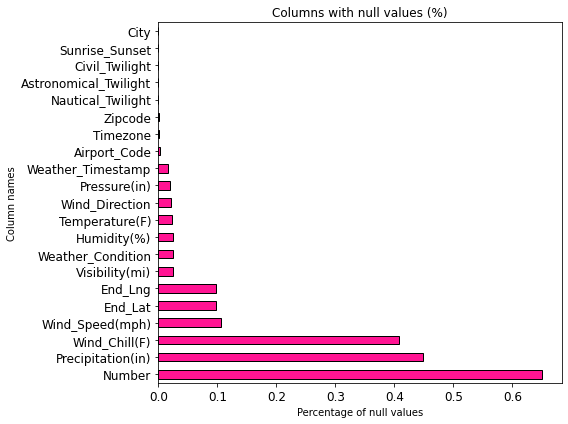

In [13]:
# Plotting missing_values to get a better idea
plt.figure(figsize=(8,6))
missing_percentages.plot(kind='barh',color='deeppink',edgecolor='black',fontsize=12)
plt.xlabel('Percentage of null values')
plt.ylabel('Column names')
plt.title('Columns with null values (%)')
plt.tight_layout();

### Exploratory Analysis and Visualization
Columns we will analyize:
1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperaure
5. Weather Condition

### City

In [14]:
cities = df['City'].unique()
len(cities)

11790

In [15]:
# Creating cities by accident df
cities_by_accident = df['City'].value_counts()
cities_by_accident.nlargest(10)

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Austin         38808
Raleigh        31355
Atlanta        29244
Sacramento     28984
Orlando        28092
Name: City, dtype: int64

In [16]:
'New York' in df['City']

False

In [17]:
'NY' in df['State']

False

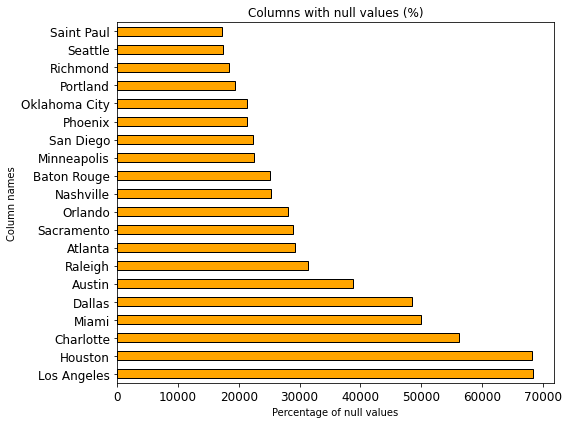

In [18]:
# Plotting cities_by_accident
plt.figure(figsize=(8,6))
cities_by_accident.nlargest(20).plot(kind='barh',color='orange',edgecolor='black',fontsize=12)
plt.xlabel('Percentage of null values')
plt.ylabel('Column names')
plt.title('Columns with null values (%)')
plt.tight_layout();

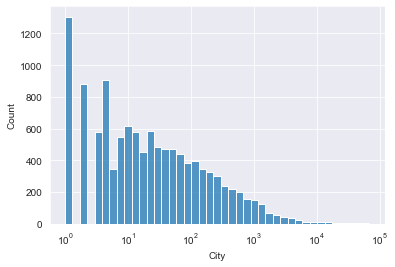

In [19]:
# Creating a histogram for cities by accident
sns.set_style('darkgrid')
sns.histplot(cities_by_accident,log_scale=True);

In [20]:
# Dividing it further into high & low accident cities 
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
low_accident_cities = cities_by_accident[cities_by_accident<1000]

In [21]:
len(high_accident_cities)

513

In [22]:
len(low_accident_cities)

11276

C:\Users\prati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


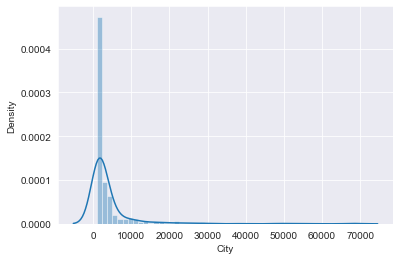

In [23]:
# Creating a distribution plot for our high accident cities
sns.distplot(high_accident_cities);

C:\Users\prati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


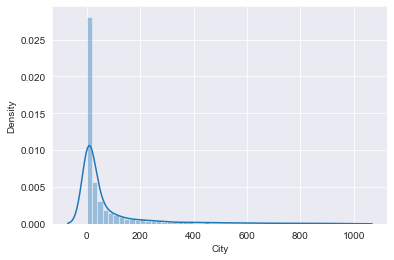

In [24]:
# Doing the same for the low accident cities
sns.distplot(low_accident_cities);

### Start Time

In [25]:
df['Start_Time'][0]

'2019-05-21 08:29:55'

In [26]:
# Converting it into a datetime format..
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [27]:
# let's check if it has turned to datetime
df['Start_Time'][0]

Timestamp('2019-05-21 08:29:55')

In [28]:
# Collecting the hour from our column
df['Start_Time'].dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

C:\Users\prati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


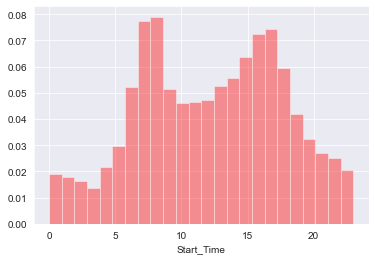

In [29]:
# Plotting to see accidents by hour
sns.distplot(df['Start_Time'].dt.hour,color='red',bins=24,kde=False,norm_hist=True);

- A high percentage of accidents occur between 6 am to 10 am. (Probably people in a hurry to get to work)
- Next highest percentage is from 3 pm to 6 pm.

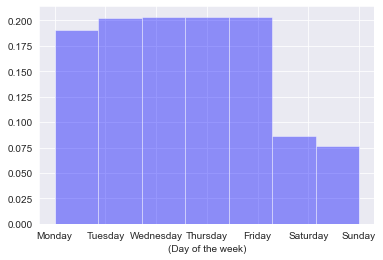

In [30]:
# Plotting to see accidents rate by the day of the week
ticks=[0,1,2,3,4,5,6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.distplot(df['Start_Time'].dt.dayofweek,color='blue',bins=7,kde=False,norm_hist=True)
plt.xticks(ticks,labels)
plt.xlabel('(Day of the week)');

- Is the distribution of accidents by hour the same on weekends as on weekdays?

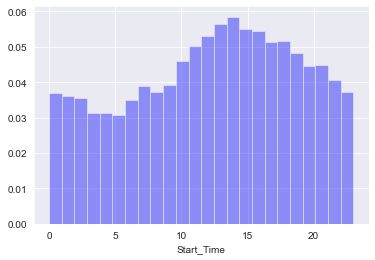

In [31]:
# Comparing the weekday data with the weekend data for accident rates by hour
sunday_start_time = df.Start_Time[df['Start_Time'].dt.dayofweek==6]
sns.distplot(sunday_start_time.dt.hour,color='blue',bins=24,kde=False,norm_hist=True);

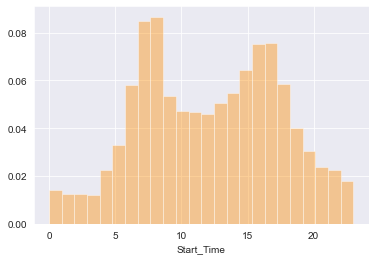

In [32]:
monday_start_time = df.Start_Time[df['Start_Time'].dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour,color='darkorange',bins=24,kde=False,norm_hist=True);

- On Sundays, the peak occures between 10 am and 3pm, unlike weekdays. 

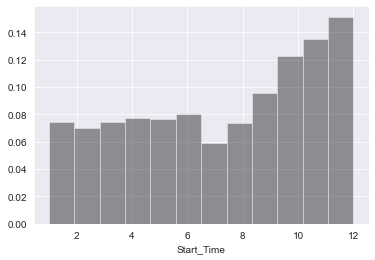

In [33]:
# Plotting to see the accidents by month
sns.distplot(df['Start_Time'].dt.month,color='black',bins=12,kde=False,norm_hist=True);

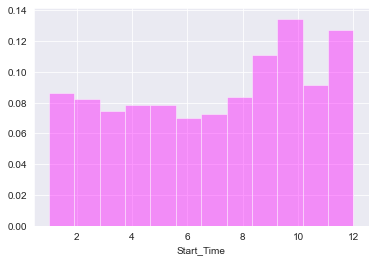

In [34]:
# Plotting by a specific year to find a trend
df_2019 = df[df['Start_Time'].dt.year==2019]
sns.distplot(df_2019['Start_Time'].dt.month,color='magenta',bins=12,kde=False,norm_hist=True);

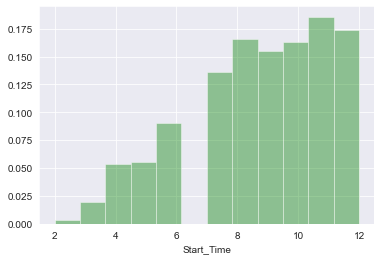

In [35]:
# Doing the same here
df_2016 = df[df['Start_Time'].dt.year==2016]
sns.distplot(df_2016['Start_Time'].dt.month,color='green',bins=12,kde=False,norm_hist=True);

#### Can you explain the month-wise trend of accidents?
- Much data is missing for 2016. Maybe even 2017.

#### Start Latitude & Start longitude

In [36]:
df['Start_Lat']

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [37]:
df['Start_Lng']

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [38]:
# Creating a sample as our data is huge and may cause problems while plotting
sample_df = df.sample(int(0.1 * len(df)))

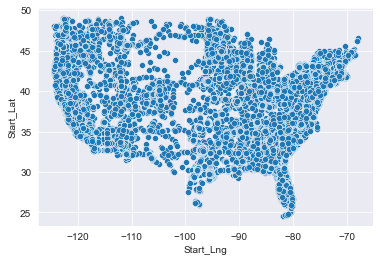

In [39]:
sns.scatterplot(x=sample_df['Start_Lng'],y=sample_df['Start_Lat']);

In [40]:
# Plotting the lat and lng on a world map to get a bigger picture 
import folium

In [41]:
lat, lon = df.Start_Lat[0] , df.Start_Lng[0]
lat,lon

(34.808868, -82.26915699999998)

In [42]:
zip(list(df['Start_Lat']),list(df['Start_Lng']))

In [43]:
sample_df = df.sample(int(0.001 * len(df)))

In [44]:
lat_lon_pairs = list(zip(list(sample_df['Start_Lat']),list(sample_df['Start_Lng'])))

In [45]:
from folium.plugins import HeatMap

In [47]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Summary & Conclusions

Insights:
- No data for 'New York'
- Less than 5% of the cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)
- The number of accidents per city decreases exponentially.